In [229]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [230]:
df = pd.read_csv("Auto.csv",na_values="?")
df.dropna(inplace=True)
df
# , index_col="mpg"

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [231]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


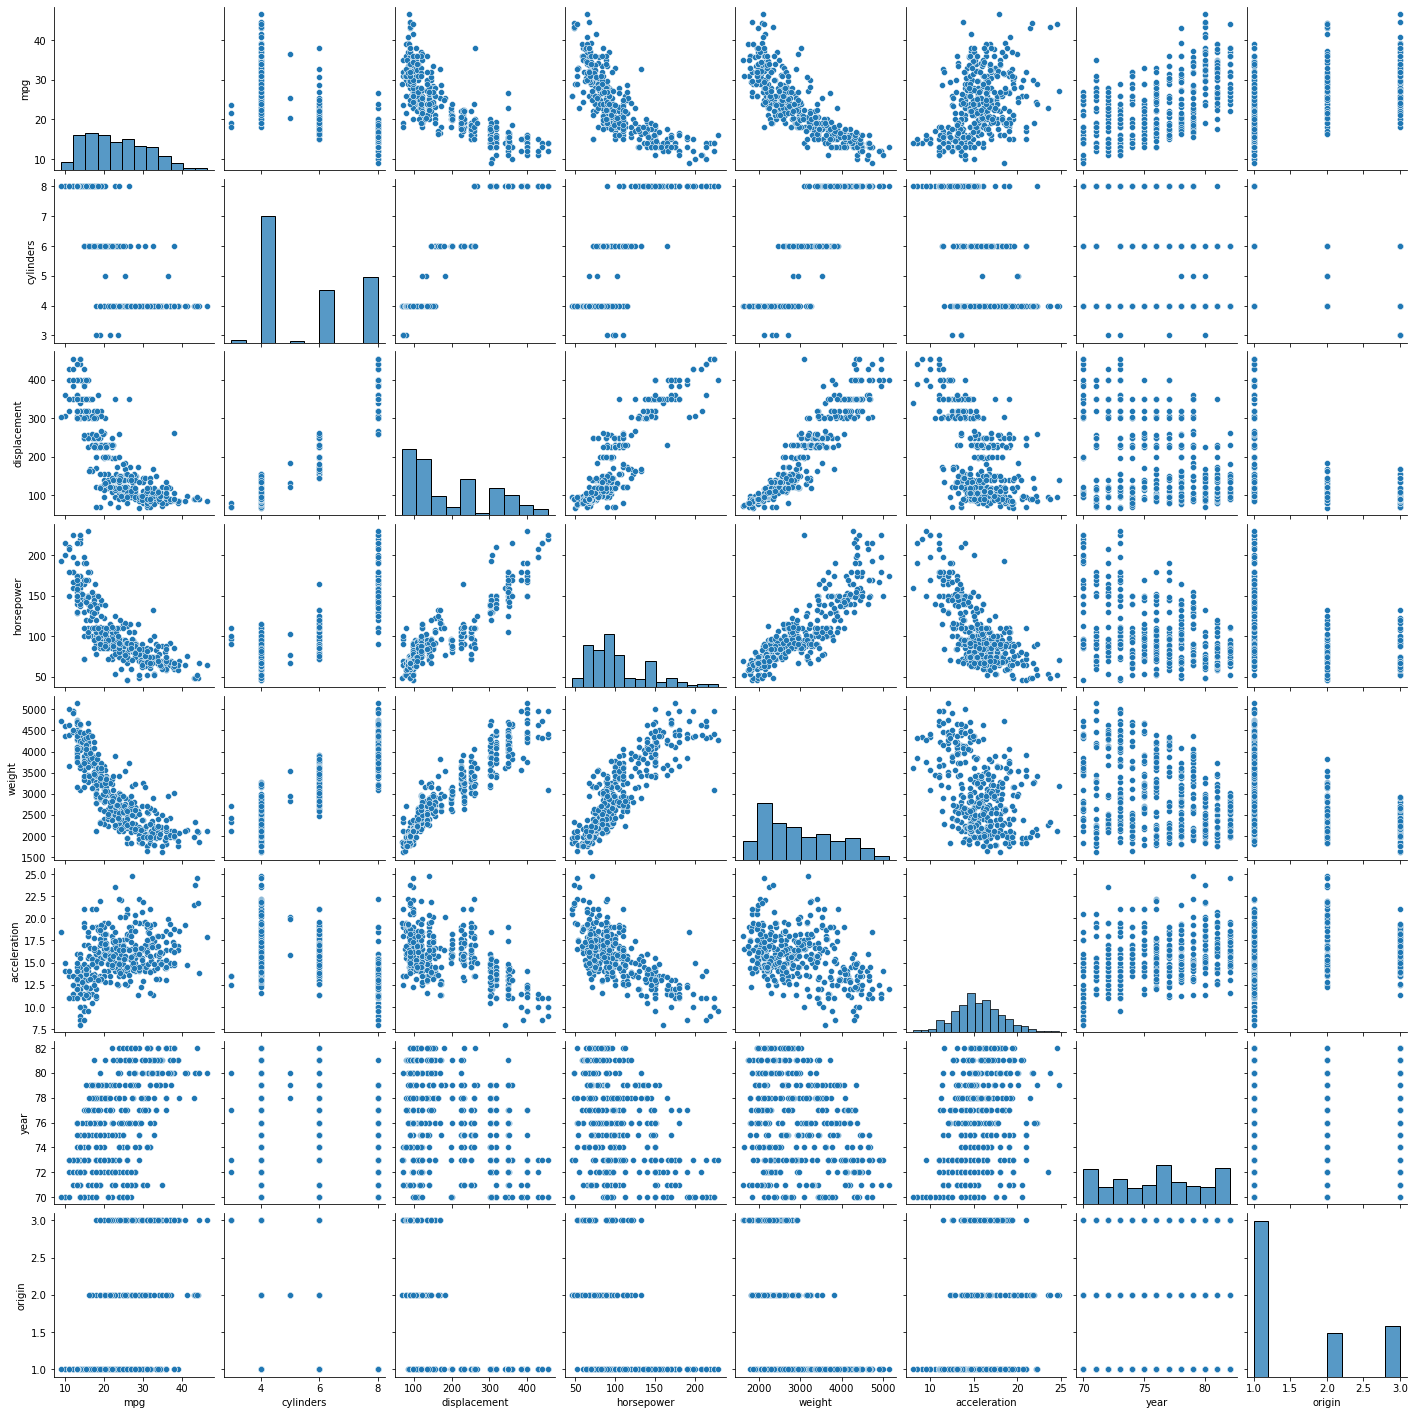

In [232]:
p = sns.pairplot(df)
p.savefig("plots.svg")
p

# LINEARITY

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


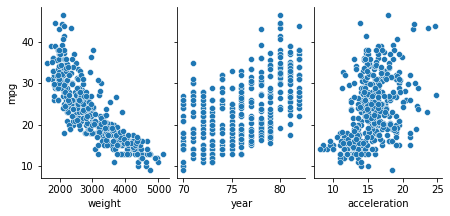

In [233]:
p = sns.pairplot(df, x_vars=['weight','year','acceleration'], y_vars='mpg', size=3, aspect=0.7)

In [234]:
df[['weight','year','acceleration']].corr()

,weight,year,acceleration
weight,1.000000,-0.309120,-0.416839
year,-0.309120,1.000000,0.290316
acceleration,-0.416839,0.290316,1.000000


In [235]:
x=df.drop(["mpg","name",'origin'],axis=1)
y=df.mpg

In [236]:
df["horsepower"].astype(int)

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: int32

In [237]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [238]:
columns_names=df.columns[df.columns.isin(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'])]

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [240]:
#MEtoda PCA do zniwelowania liniowosci zmiennych
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
#wyjasniona zmiennosc 
pca.explained_variance_ratio_.cumsum().max()

0.9837415619431512

In [241]:
#transform X by pca 
X = pca.transform(X)

In [242]:
#correlation between pca components -> no corellation
pd.DataFrame(X).corr()

,0,1,2,3
0,1.000000e+00,2.594620e-16,-1.208238e-16,6.710592e-16
1,2.594620e-16,1.000000e+00,-1.650481e-16,1.178661e-16
2,-1.208238e-16,-1.650481e-16,1.000000e+00,-2.559937e-16
3,6.710592e-16,1.178661e-16,-2.559937e-16,1.000000e+00


In [243]:
from copy import deepcopy
X_constant=deepcopy(X)

In [244]:
# An intercept is not included by default and should be added by the user. See statsmodels.tools.add_constant.

#adding constant to dataset which is not provided later in the model
X_constant= sm.add_constant(X)
#train test sets for model without constant provided by library
from sklearn.model_selection import train_test_split
X_train_constant, X_test_constant, y_train_constant, y_test_constant = train_test_split(X_constant, y,random_state = 0,test_size=0.25)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


In [246]:
'''
usuniecie indeksow z x train; z ytrain nie dzialalo
X_train=pd.DataFrame(X_train)
X_train.drop(df.index[[10, 108, 140, 186, 282, 289]],inplace=True)
#X_train = [element for idx, element in enumerate(X_train) if (element not in  [10, 108, 140, 186, 282, 289])]
y_train=pd.DataFrame(y_train)
y_train.drop(df.index[[10, 108, 140, 186, 282, 289]],inplace=True)

'''





'\nusuniecie indeksow z x train; z ytrain nie dzialalo\nX_train=pd.DataFrame(X_train)\nX_train.drop(df.index[[10, 108, 140, 186, 282, 289]],inplace=True)\n#X_train = [element for idx, element in enumerate(X_train) if (element not in  [10, 108, 140, 186, 282, 289])]\ny_train=pd.DataFrame(y_train)\ny_train.drop(df.index[[10, 108, 140, 186, 282, 289]],inplace=True)\n\n'

In [247]:
len(X_train)

294

In [248]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [249]:
#statistics of model and variables used
import statsmodels.api as sm


mod = sm.OLS(y_train_constant,X_train_constant)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     273.5
Date:                Fri, 13 May 2022   Prob (F-statistic):           6.58e-97
Time:                        17:03:31   Log-Likelihood:                -791.70
No. Observations:                 294   AIC:                             1593.
Df Residuals:                     289   BIC:                             1612.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3186      0.210    110.870      0.0

In [250]:
print("R squared [train set]: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared [train set]: 0.7910166338282096


In [251]:
print("R squared [test set]: {}".format(r2_score(y_true=y_test,y_pred=regr.predict(X_test))))

R squared [test set]: 0.7799248221767566


In [252]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 8.458842092382145e-16


In [253]:
#znalezienie indeksów ktore są odstające >9 error
def condition(x): return x > 9
#create list; iterate on index,residuals if codnition is met and residuals >9 return index
output = [idx for idx, element in enumerate(residuals) if condition(element)]
output #index of train set with have residuals higher than 9

[1, 10, 140, 186, 282, 289]

# Check Linear Relationship between the Target and the Feature

In [254]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [255]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\zereb\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


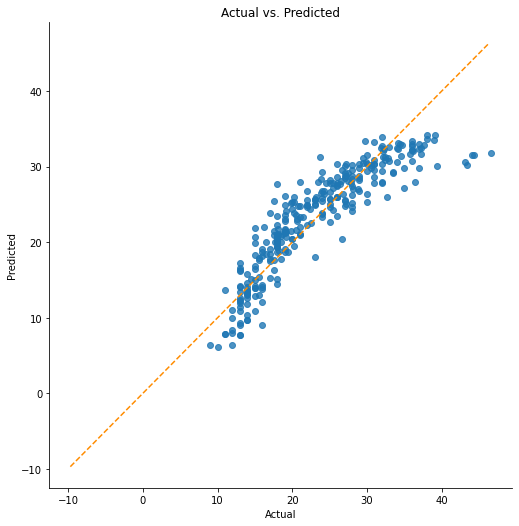

In [256]:
linear_assumption(regr, X_train, y_train)

# Check for Homoscdasticity

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


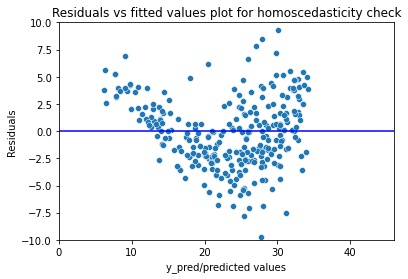

In [257]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,46)
p = sns.lineplot([0,47],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [258]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.8804767585365031), ('p-value', 0.7762258599299916)]

In [259]:
# p-value > 0.05 => Residuals are Homoscedastic

# Check for Normality of residuals

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


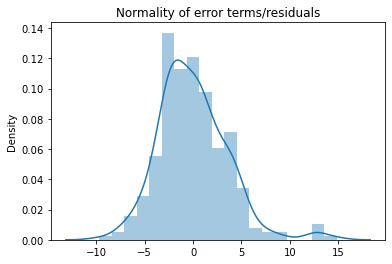

In [260]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [261]:
from statsmodels.stats.stattools import jarque_bera
jb,jbpval,skew,kurtosis=jarque_bera(residuals)
jbpval,skew ,kurtosis

(3.071026749338428e-18, 0.8244525796323323, 4.965885762813075)

# Autocorrelation of residuals

C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zereb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


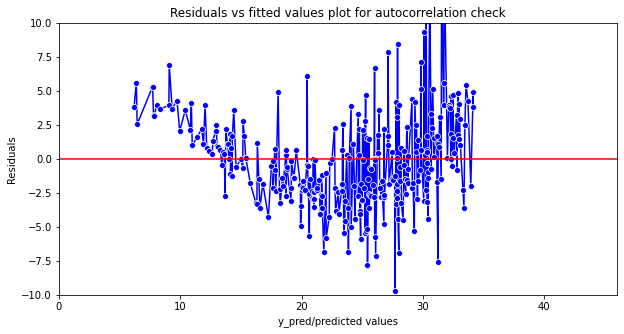

In [262]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,46)
p = sns.lineplot([0,47],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [263]:
import statsmodels.api as sm

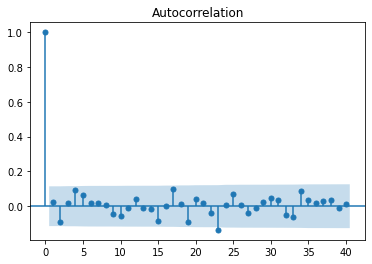

In [264]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

In [265]:
#test autocorellation of residuals with DW test
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(residuals)
print(dw)
#DW statistic e <0,4>
r=1-dw/2 #r -pearson
print(r)

1.9482057750714243
0.02589711246428783


# Check Multicollinearity among Predictors

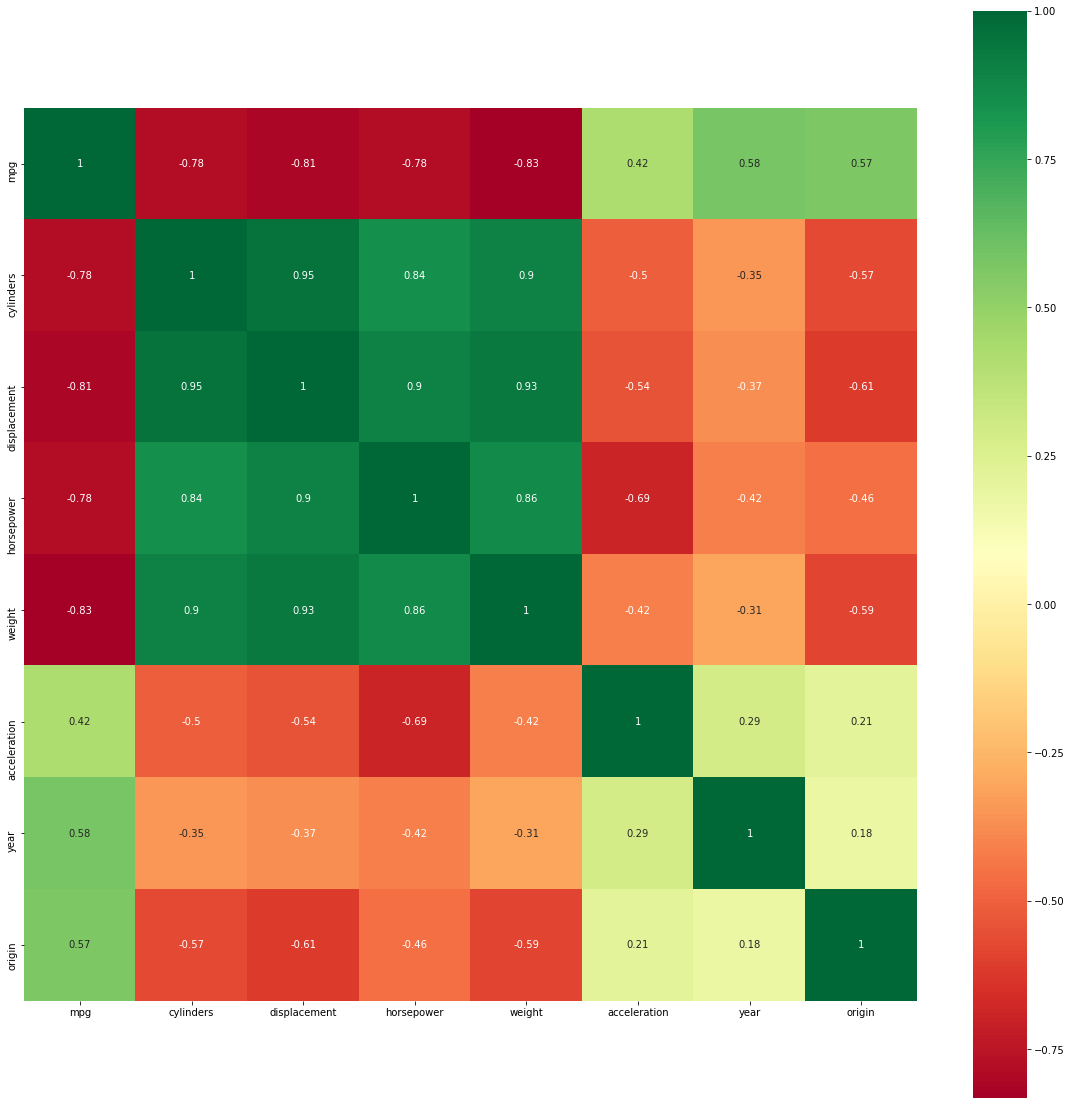

In [266]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [267]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')


In [268]:
multicollinearity_assumption(regr, X_train, y_test, ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'])

Assumption 3: Little to no multicollinearity among predictors


ValueError: Shape of passed values is (294, 4), indices imply (294, 6)

<Figure size 720x576 with 0 Axes>